In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

# **Análisis Exploratorío de Datos - Velocidad del Viento**

El conjunto de datos abarca 6574 registros diarios promediados, provenientes de un conjunto de 5 sensores para variables meteorológicas, todos integrados en una estación meteorológica. Dicha estación se situó en un área extensa y despejada, a una altura de 21 metros. La recolección de datos se extendió desde enero de 1961 hasta diciembre de 1978, abarcando un total de 17 años. Dentro de la información recopilada se incluyen las precipitaciones medias diarias, así como las temperaturas máxima y mínima y la temperatura mínima sobre la superficie del césped.

El dataset contiene 6574 filas y 9 Columnas del DATASET:

DATE (YYYY-MM-DD).

WIND: Average wind speed [nudos].

IND: First indicator value.

RAIN: Precipitation Amount (mm).

IND.1: Second indicator value.

T.MAX: Maximum Temperature (°C).

IND.2: Third indicator value.

T.MIN: Minimum Temperature (°C).

T.MIN.G: 09utc Grass Minimum Temperature (°C).

Nota: Para el desarrollo de este informe solo se han tomado en cuenta las variables DATE, WIND, RAIN, T.MAX, T.MIN y T.MIN.G; los indicadores mencionados previamente se excluyen del análisis teniendo en cuenta que la fuente en la que reposa el conjunto de datos estudiado, no proporciona una descripción o definición sobre qué se mide con dichos indicadores.

## Exploración inicial

In [22]:
df = pd.read_csv("C:/Users/kathy/Desktop/ml/wind_dataset.csv", sep=',')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


A continuación, presentamos la descripción general del conjunto de datos `Wind Speed Dataset`. 

In [15]:
print("Tipo de datos:")
print(df.dtypes)

Tipo de datos:
DATE        object
WIND       float64
IND          int64
RAIN       float64
IND.1      float64
T.MAX      float64
IND.2      float64
T.MIN      float64
T.MIN.G    float64
dtype: object


In [19]:
total_datos = df.shape[0]
print(total_datos)

6574


Hemos observado que nuestro conjunto de datos consta de `9` variables (columnas) que tienen tipos de datos `float64`, `int64` y `object`. El tipo de dato `float64` incluye valores numéricos con decimales, el tipo `int64`incluye valores númericos enteros y el tipo `object` abarca variables que contienen información textual o mixta (texto y números) en un formato no numérico (datos categóricos). En total, tenemos 6574 registros en nuestro conjunto de datos. 

Eliminamos las columnas correpondientes a las variables de los indicadores, como se mencionó de manera inicial:

In [23]:
df = df.drop(columns=["IND", "IND.1", "IND.2"])

Tambien es necesario cambiar el formato de la columna 'DATE' a formato de fecha, como se muestra a continuación:

In [24]:
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.head())

        DATE   WIND  RAIN  T.MAX  T.MIN  T.MIN.G
0 1961-01-01  13.67   0.2    9.5    3.7     -1.0
1 1961-01-02  11.50   5.1    7.2    4.2      1.1
2 1961-01-03  11.25   0.4    5.5    0.5     -0.5
3 1961-01-04   8.63   0.2    5.6    0.4     -3.2
4 1961-01-05  11.92  10.4    7.2   -1.5     -7.5


Además, con el comando *df.info()* es posible determinar si existen datos faltantes o nulos dentro de cada variable, así como la naturaleza de cada una.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   RAIN     6574 non-null   float64       
 3   T.MAX    5953 non-null   float64       
 4   T.MIN    5900 non-null   float64       
 5   T.MIN.G  6214 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 308.3 KB


Ahora, El conjunto de datos contiene 6574 observaciones y 6 variables. La variable DATE indica la fecha de cada observación, mientras que las variables restantes corresponden a WIND, RAIN, T.MAX, T.MIN y T.MIN.G, las cuales incluyen valores numéricos con decimales.

In [36]:
df_desc = df.copy()
df_desc = df_desc.drop(columns=["DATE"])
df_desc.describe()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
count,6574.000000,6574.000000,5953.000000,5900.000000,6214.000000
mean,9.796834,1.885169,13.339123,6.411678,2.736547
std,4.977272,4.030529,4.890546,4.637243,5.569175
min,0.000000,0.000000,-0.100000,-11.500000,-14.400000
25%,6.000000,0.000000,9.600000,3.000000,-1.000000
50%,9.210000,0.200000,13.300000,6.500000,3.000000
75%,12.960000,2.000000,17.200000,10.000000,7.000000
max,30.370000,67.000000,26.800000,18.000000,15.800000


Según el resumen, podemos observar que la variable WIND (velocidad del viento) tiene valores que van desde 0 hasta 30.37 nudos. La mayoría de los datos se encuentran en el rango de 6 a 12 nudos, ya que el 25% de los datos está por debajo de 6 y el 75% está por debajo de 12. La mediana de la velocidad del viento es de aproximadamente 9.21 nudos, lo que significa que la mitad de los datos están por encima de este valor y la otra mitad por debajo. Además, la media está cerca de 9.8 nudos.

En cuanto a la variable RAIN (cantidad de precipitación), vemos que la cantidad de lluvia varía desde 0 hasta 67 mm. La mayoría de los días tienen una cantidad de lluvia baja, ya que el 25% de los datos tienen una cantidad de lluvia de 0 mm y el 75% tienen menos de 2 mm. La mediana de la cantidad de lluvia es de 0.2 mm, lo que significa que la mitad de los días tienen una cantidad de lluvia superior a este valor y la otra mitad inferior.

Para las variables de temperatura, T.MAX (temperatura máxima) y T.MIN (temperatura mínima), vemos que los valores están en grados Celsius. La temperatura máxima varía desde -0.1°C hasta 26.8°C, mientras que la temperatura mínima varía desde -11.5°C hasta 18°C. La mediana de T.MAX es aproximadamente 13.3°C y la mediana de T.MIN es aproximadamente 6.5°C.

Las variables T.MIN.G (temperatura mínima en el pasto) y T.MIN (temperatura mínima) parecen tener valores similares, pero T.MIN.G tiende a ser un poco más baja en general.


Es importante mencionar que se require analizar sin se presentan valores faltantes (NA’s). A continuación procederemos a realizar un análisis detallado de los datos faltantes antes de continuar con el reporte.

## Procesamiento de Datos.

### Análisis de Datos Faltantes
A continuación, se realiza un análisis para identificar la presencia de `datos faltantes` en nuestro conjunto de datos. Para esto usamos el siguiente código: 

Text(0.5, 1.0, 'Datos faltantes por variable')

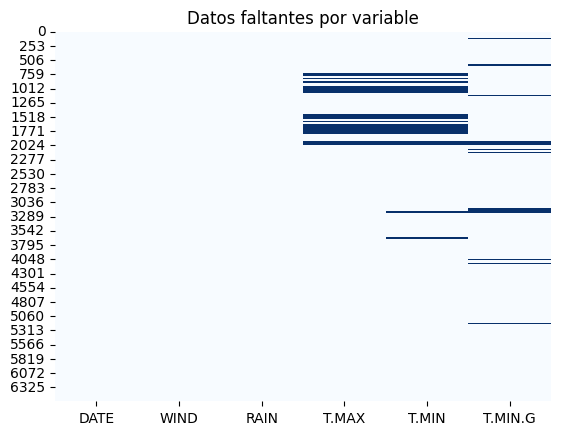

In [33]:
sns.heatmap(df.isnull(), cbar=False,  cmap='Blues').set_title("Datos faltantes por variable")

In [34]:
pd.isna(df).sum()

DATE         0
WIND         0
RAIN         0
T.MAX      621
T.MIN      674
T.MIN.G    360
dtype: int64

Se observa que hay 360 observaciones que tienen datos faltantes para la variable T.MIN.G, 621 para la variable T.MAX y 674 para la variable T.MIN.

Teniendo en cuenta estos hallazgos, se realiza imputación de datos, asignando la media a los valores faltantes.

### Imputación de Datos

Procedemos a realizar la imputación de datos: 

In [35]:
df2 = df.copy()

df2['T.MAX'] = df2['T.MAX'].fillna(df2['T.MAX'].mean())

df2['T.MIN'] = df2['T.MIN'].fillna(df2['T.MIN'].mean())

df2['T.MIN.G'] = df2['T.MIN.G'].fillna(df2['T.MIN.G'].mean())

Verificamos nuevamente que no existan valores faltantes. 

In [38]:
df2.isnull().sum()

DATE       0
WIND       0
RAIN       0
T.MAX      0
T.MIN      0
T.MIN.G    0
dtype: int64

### Detección y manejo de valores atípicos (outliers):
A continuación, se realiza un análisis para identificar la presencia de `outliers` en nuestro conjunto de datos. Para esto usamos el método de detección de valores atípicos mediante las puntuaciones $ Z $, el cual establece el siguiente criterio: `Cualquier` dato cuya `puntuación esté fuera de la tercera desviación estándar es un valor atípico`. 

In [41]:
import numpy as np

#Definición de función para detección de datos atípicos a través de ZScore

def outliers_zscore(data):
    outliers = []    
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [33]:
from IPython.display import display, Markdown

display(Markdown('<center><img src="img/outlierszscores.png" alt="figure"></center>'))

<center><img src="img/outlierszscores.png" alt="figure"></center>

La función `outliers_zscore` recorrer todos los datos y calcular la puntuación $ Z $ para cada punto de datos utilizando la fórmula  $  \frac{(x_i - \mu)}{\sigma} $, donde $ x_i $ es cada valor de los datos, $ \mu $ es la media de los datos y $ \sigma $ es la desviación estándar de los datos. Luego, establece un umbral en la tercera desviación estandar e identifica como valores atípicos aquellos datos cuya puntuación $ Z $ (en valor absoluto) excede este umbral.  

A continuación, se observan los datos atípicos obtenidos luego de aplicar el método descrito anteriormente. 

In [47]:
df_out = df2.copy()
df_out = df.rename({'WIND': 'wind', 
               'RAIN': 'rain', 
               'T.MAX': 't_max', 
               'T.MIN': 't_min', 
               'T.MIN.G': 't_min_g',}, axis=1)
df_out.head()

wind_outliers = outliers_zscore(df_out.wind)
rain_outliers = outliers_zscore(df_out.rain)
t_max_outliers = outliers_zscore(df_out.t_max)
t_min_outliers = outliers_zscore(df_out.t_min)
t_min_g_outliers = outliers_zscore(df_out.t_min_g)


print("Outliers a través Método Z-scores para la variable WIND: ", wind_outliers)
print("Outliers a través Método Z-scores para la variable RAIN: ", rain_outliers)
print("Outliers a través Método Z-scores para la variable T.MAX: ", t_max_outliers)
print("Outliers a través Método Z-scores para la variable T.MIN: ", t_min_outliers)
print("Outliers a través Método Z-scores para la variable T.MIN.G: ", t_min_g_outliers)


Outliers a través Método Z-scores para la variable WIND:  [25.62, 25.96, 25.0, 29.54, 28.84, 25.62, 26.87, 29.58, 25.29, 28.91, 28.79, 27.79, 25.92, 28.5, 27.08, 29.17, 27.58, 25.33, 28.62, 30.37, 28.16, 25.12, 26.0, 26.54, 26.54, 25.25, 27.71, 25.04, 25.12, 25.46, 25.33, 25.96, 25.62, 26.42, 28.16, 25.54, 27.71]
Outliers a través Método Z-scores para la variable RAIN:  [21.5, 17.2, 21.4, 15.0, 32.0, 16.7, 17.8, 27.0, 24.7, 18.3, 20.0, 19.0, 17.0, 32.0, 18.5, 14.8, 18.8, 15.1, 44.4, 15.8, 16.2, 16.2, 24.3, 17.3, 24.5, 15.5, 18.5, 18.7, 32.4, 17.6, 16.4, 18.1, 15.7, 25.1, 25.3, 52.2, 25.6, 19.1, 28.0, 27.8, 16.8, 17.0, 17.5, 17.4, 18.1, 19.0, 44.9, 23.1, 15.6, 15.6, 16.5, 14.9, 22.9, 26.7, 22.5, 17.3, 32.4, 17.5, 15.4, 15.7, 21.4, 20.0, 16.6, 15.9, 27.5, 19.7, 27.8, 15.3, 15.0, 20.3, 19.1, 28.0, 23.8, 40.7, 17.6, 14.0, 14.5, 14.0, 18.0, 24.2, 23.8, 27.9, 20.5, 15.0, 15.4, 15.6, 15.7, 14.8, 23.1, 15.3, 28.3, 18.0, 14.6, 38.0, 14.7, 23.3, 18.2, 15.8, 17.2, 17.2, 14.9, 15.7, 28.0, 21.0, 21

## Visualización de Resumen Estadístico

### Análisis Univariado

A continuación, se presenta el fragmento de código correspondiente a la función que generá dos tipos diferentes de gráficos (Histograma y Diagrama de Cajas y Bigotes) para visualizar una variable unidimensional. 

In [65]:
import plotly.figure_factory as ff
import pandas as pd

def double_plot(data, columna, descripcion):
    fig = go.Figure()
    fig = ff.create_distplot([data[columna].to_list()],[descripcion],show_rug=False)

    fig.show()

A continuación se observa la distribución de nuestras variables objeto de análisis. 

* `WIND`

In [32]:
df_r_b = df2.copy()
bar_wind = double_plot(df_r_b,'WIND','WIND')

* `RAIN`

In [28]:
df_r_b = df2.copy()
bar_wind = double_plot(df_r_b,'RAIN','RAIN')

* `T.MAX`

In [29]:
df_r_b = df2.copy()
bar_wind = double_plot(df_r_b,'T.MAX','T.MAX')

* `T.MIN`

In [31]:
df_r_b = df2.copy()
bar_wind = double_plot(df_r_b,'T.MIN','T.MIN')

* `T.MIN.G`

In [30]:
df_r_b = df2.copy()
bar_wind = double_plot(df_r_b,'T.MIN.G','T.MIN.G')

In [26]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=df2['WIND'], name='WIND'))
fig.add_trace(go.Box(y=df2['RAIN'], name='RAIN'))
fig.add_trace(go.Box(y=df2['T.MAX'], name='T.MAX'))
fig.add_trace(go.Box(y=df2['T.MIN'], name='T.MIN'))
fig.add_trace(go.Box(y=df2['T.MIN.G'], name='T.MIN.G'))


fig.update_layout(
    title="Box Plot de Variables asociadas a la velocidad del viento",
    yaxis_title="Valor",
    xaxis_title="Variable"
)
fig.show()

En concordancia con lo hallado en el resúmen estadístico, se visualizan los box plot, donde además de obtener una idea gráfica de dicho resúmen, obtenemos una idea preliminar de como podría lucir la distribución de nuestras variables. Además, podemos observar que las variables, a excepción de T.MAX, contienen datos atípicos en sus observaciones.

In [37]:
from plotly.subplots import make_subplots as sp

fig = sp(rows=2, cols=3, shared_yaxes=True,
            subplot_titles=("WIND", "RAIN", "T.MAX", "T.MIN", "T.MIN.G"))

fig.add_trace(go.Scatter(x=df2['DATE'], y=df2['WIND'], mode='lines', line=dict(color='blue'), opacity=.5),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df2['DATE'], y=df2['RAIN'], mode='lines', line=dict(color='red'), opacity=.5),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df2['DATE'], y=df2['T.MAX'], mode='lines', line=dict(color='green'), opacity=.5),
              row=1, col=3)
fig.add_trace(go.Scatter(x=df2['DATE'], y=df2['T.MIN'], mode='lines', line=dict(color='purple'), opacity=.5),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df2['DATE'], y=df2['T.MIN.G'], mode='lines', line=dict(color='orange'), opacity=.5),
              row=2, col=2)


fig.update_layout(
    title="Trend Plots de las variables asociadasa a la velocidad del viento",
    xaxis_title="Fecha",
    yaxis_title="Valor",
    showlegend=False
)
fig.show()

La gráfica de tendencia de las variables muestra un comportamiento interesante de describir. Para la velocidad del viento, no se percibe una tendencia o patrón que indique comportamiento estacional. La lluvia es similar; muestra un comportamiento irregular en los periodos observados, sin una tendencia marcada. La temperatura máxima, la temperatura mínima y la temperatura mínima a nivel del césped tienen más similitud en que, además de no mostrar una tendencia a través del tiempo, parecen marcar un patrón repetitivo de manera periódica.

### Análisis de Correlación

A continuación se presenta análisis de `correlación` entre variables para evaluar `la relación lineal` entre pares de variables dentro del conjunto de datos a través de gráfico de dispersión.

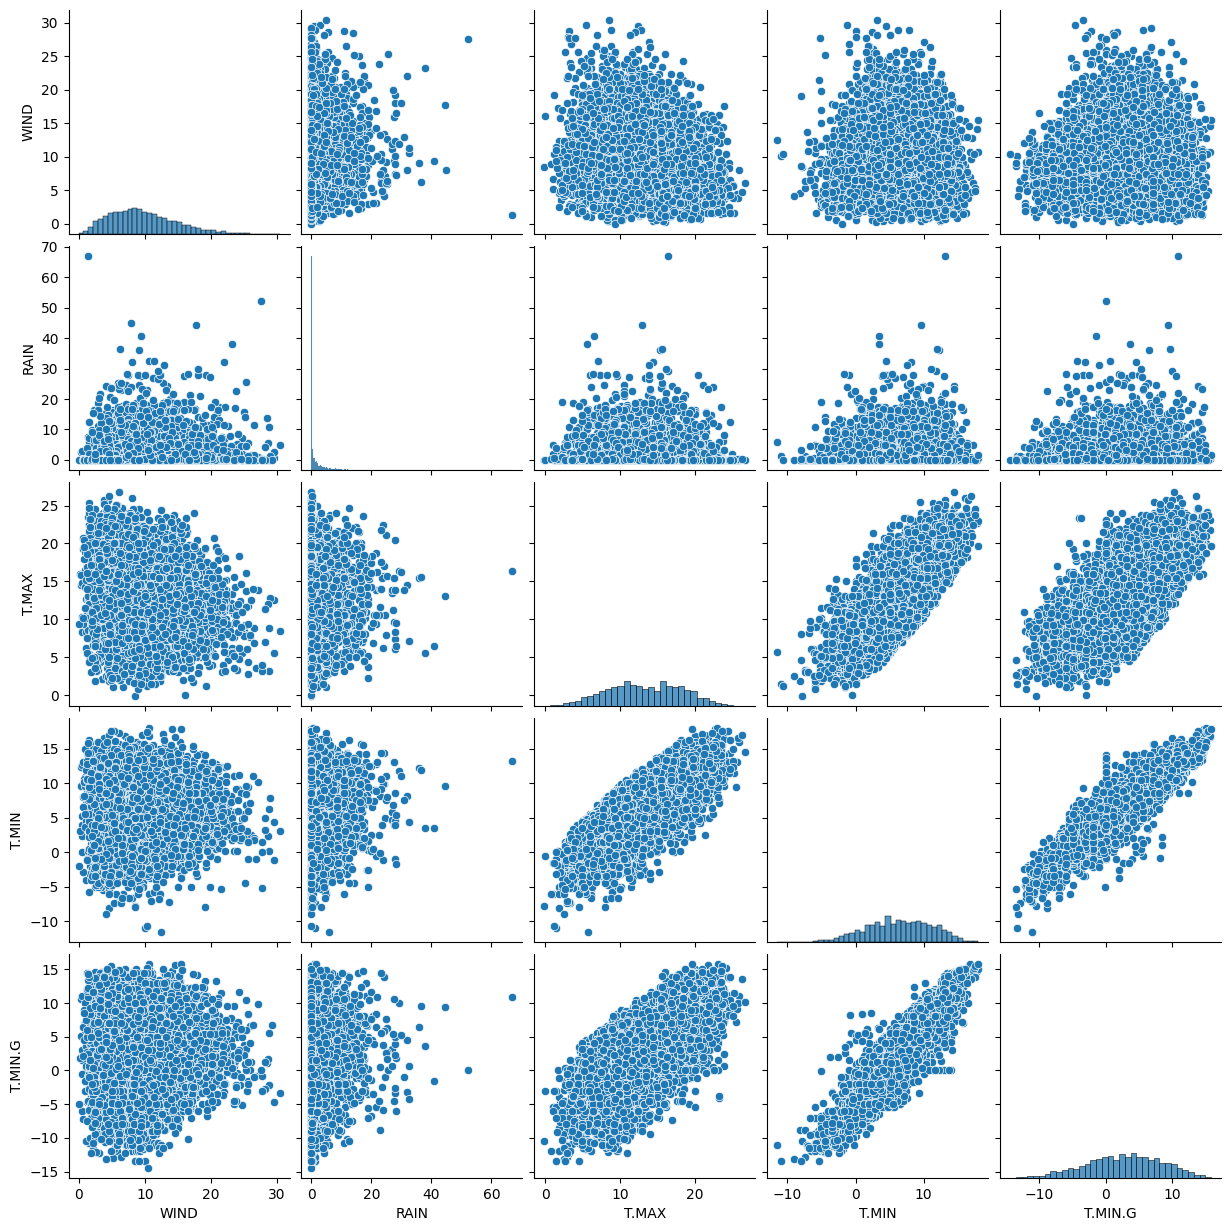

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.pairplot(df_desc)
plt.show()

Análisis de `correlación` a través de `mapa de calor`.

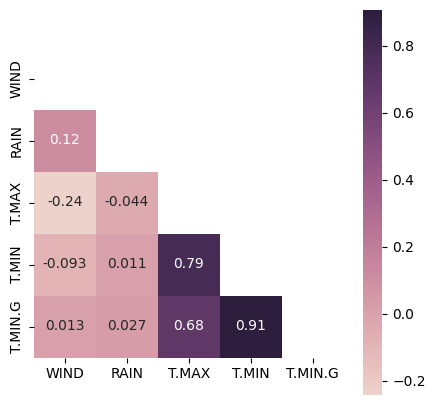

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_r_c = df_desc.copy()

plt.figure(figsize=(5,5))
corr=df_r_c[:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), mask=mask, square = True, annot = True)
plt.show()

In [45]:
print(df_r_c.corr())

             WIND      RAIN     T.MAX     T.MIN   T.MIN.G
WIND     1.000000  0.120876 -0.242559 -0.093014  0.012823
RAIN     0.120876  1.000000 -0.044248  0.011067  0.027365
T.MAX   -0.242559 -0.044248  1.000000  0.789980  0.679804
T.MIN   -0.093014  0.011067  0.789980  1.000000  0.906869
T.MIN.G  0.012823  0.027365  0.679804  0.906869  1.000000


A través del mapa de calor podemos observar gráfica y numéricamente que la velocidad del viento (WIND) presenta una correlación negativa moderada con la temperatura máxima (T.MAX), lo que sugiere que a medida que la velocidad del viento aumenta, la temperatura máxima tiende a disminuir. Por otro lado, la correlación entre la cantidad de lluvia (RAIN) y la temperatura mínima (T.MIN) es baja y prácticamente nula, lo que indica una relación débil entre estas dos variables. La temperatura mínima del césped (T.MIN.G) muestra una correlación positiva moderada con la temperatura mínima y una correlación prácticamente nula con la velocidad del viento. Además, se observa una correlación fuerte y positiva entre la temperatura mínima y la temperatura mínima del césped, lo que sugiere una relación sólida entre estas dos variables.